# <center>Работа геолокацией
## Geopy

In [2]:
from geopy.geocoders import Nominatim
import pandas as pd

In [3]:
data = pd.read_excel('data/data_ford_price.xlsx')
geolocator = Nominatim(user_agent="geoapiExercises")
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Fort Henry Drive, Kingsport, Sullivan County, East Tennessee, Tennessee, 37663, United States


In [4]:
address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'region': 'East Tennessee',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

In [5]:
Latitude = str(data['lat'][5])
Longitude =  str(data['long'][5])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

E&J Motors, Southeast Washington Street, Montavilla, Portland, Multnomah County, Oregon, 98215, United States


## Geopandas & shapely

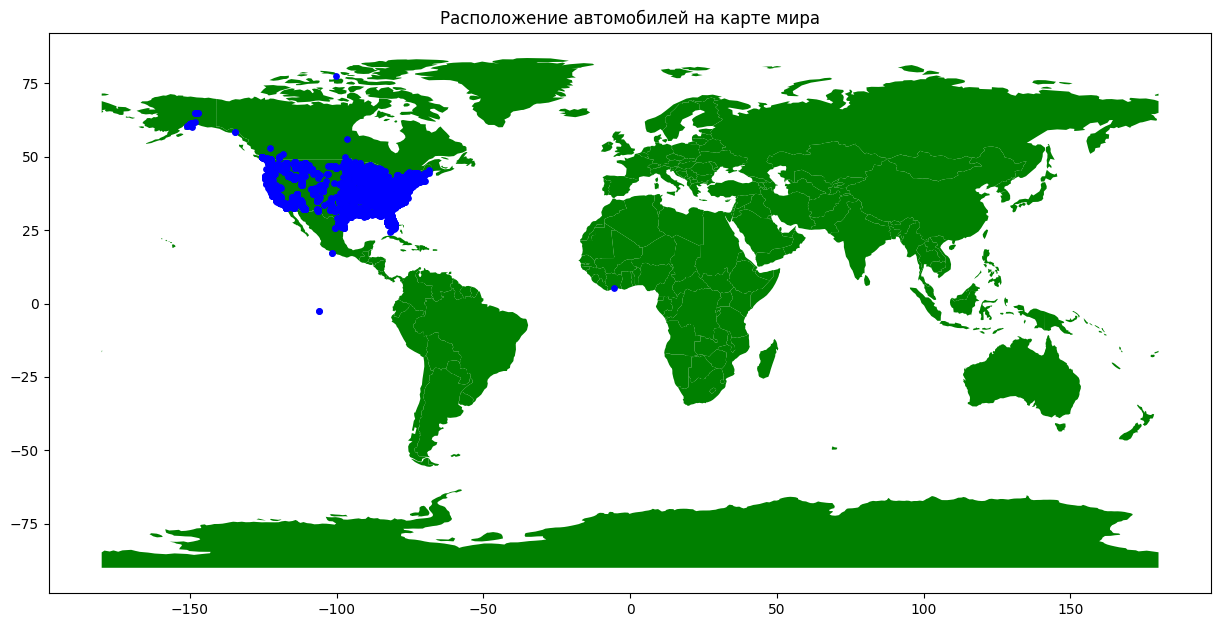

In [40]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
 
geometry = data[['long', 'lat']].apply(lambda row: Point(row['long'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(data, geometry=geometry)
 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15), color='green'), marker='o', color='blue', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()


In [41]:
import plotly.express as px
import pandas as pd
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()